# 주성분 분석(PCA)
* 차원 축소에 대해 이해
* 대표적인 차원 축소 알고리즘인 PCA(주성분 분석) 모델을 학습

### 지난 시간에

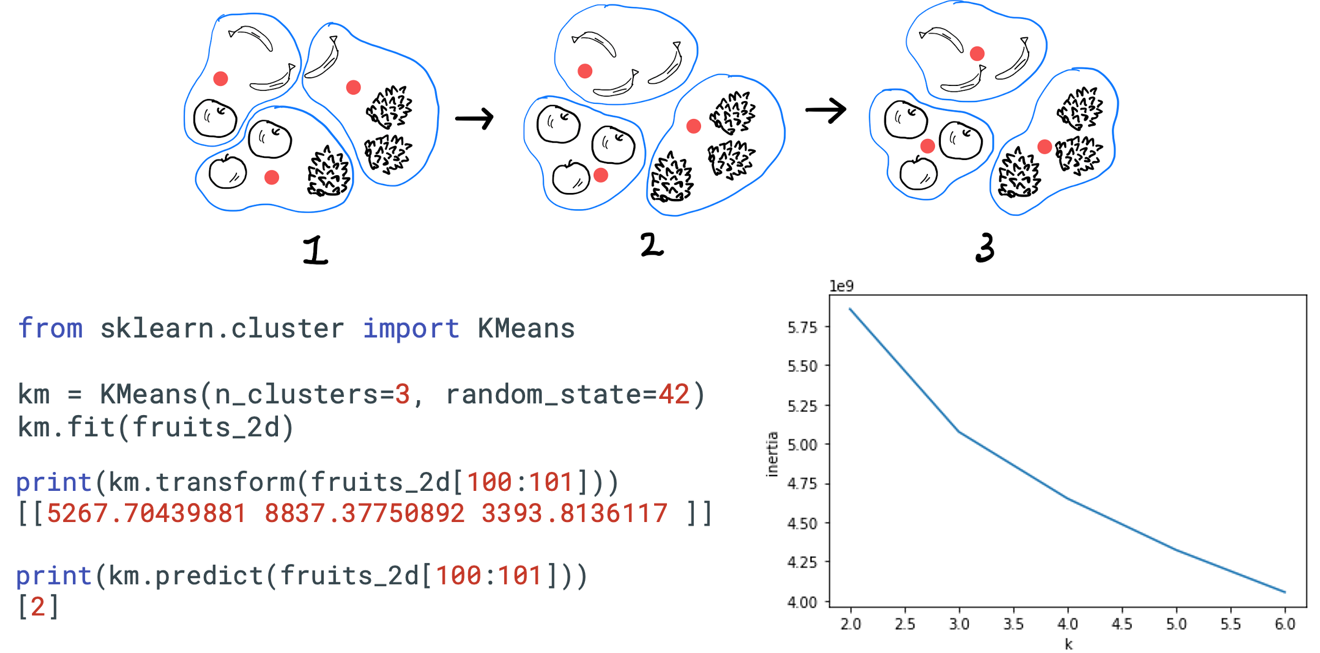

---

#### [이벤트는 성공했으나 너무 많은 사진이...]
* 너무 많은 사진이 등록되어 **저장 공간이 부족**한 상황 발생
* 군집이나 분류에 영향을 끼치지 않으면서 업로드된 **사진의 용량을 줄일 수 있는 방법 필요**

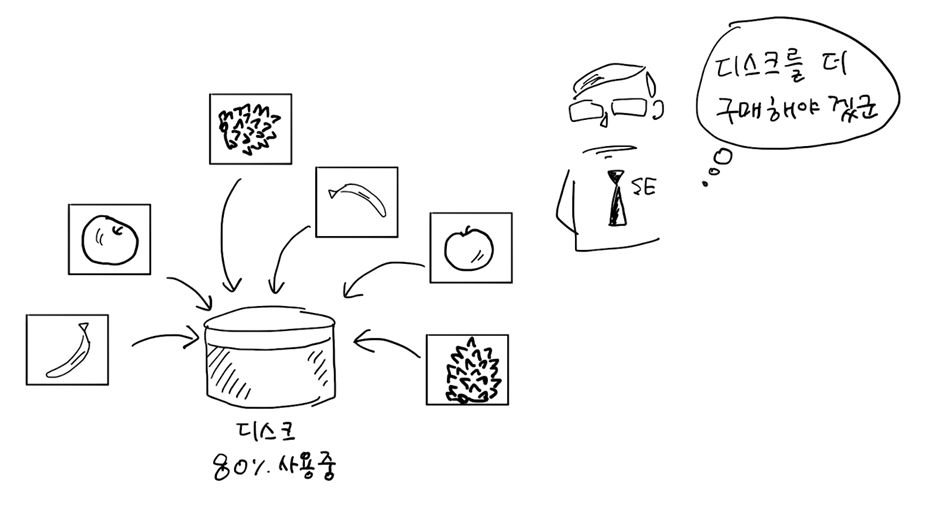

### 차원과 차원 축소

#### [차원 용어에 대한 이해]
* **머신러닝에서의 차원(dimension) : 특성(feature)의 개수**
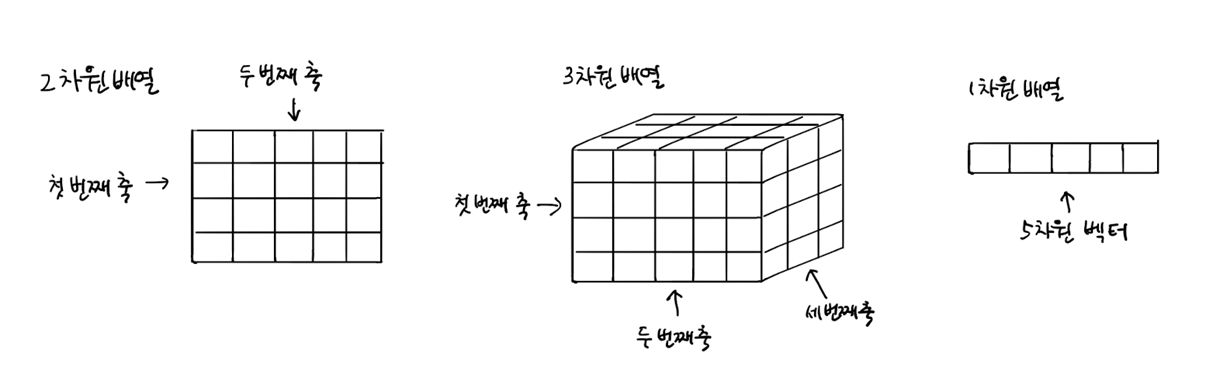

#### [차원 축소(Dimensionality Reduction)]
* 데이터를 잘 나타내는 **일부 특성을 선택**하여 데이터 크기를 줄이고 비지도 학습 모델의 성능을 향상시킬 수 있는 방법
* 줄어든 차원에서 다시 원본 차원으로 **손실을 최대한 줄이면서 복원 가능**

### 주성분 분석(PCA : Principal Component Analysis) 소개
* **고차원 데이터를 더 적은 수의 축으로 변환**하여 데이터를 **간결하게 표현**하는 기법
* 새로 만든 축은 **데이터의 분산(정보량)이 가장 큰 방향**을 기준으로 설정
* 서로 상관된 변수들을 압축해서 중요한 정보만 남기는 것

#### [두 개의 특성(x1, x2)에 대한 주성분 분석 예]
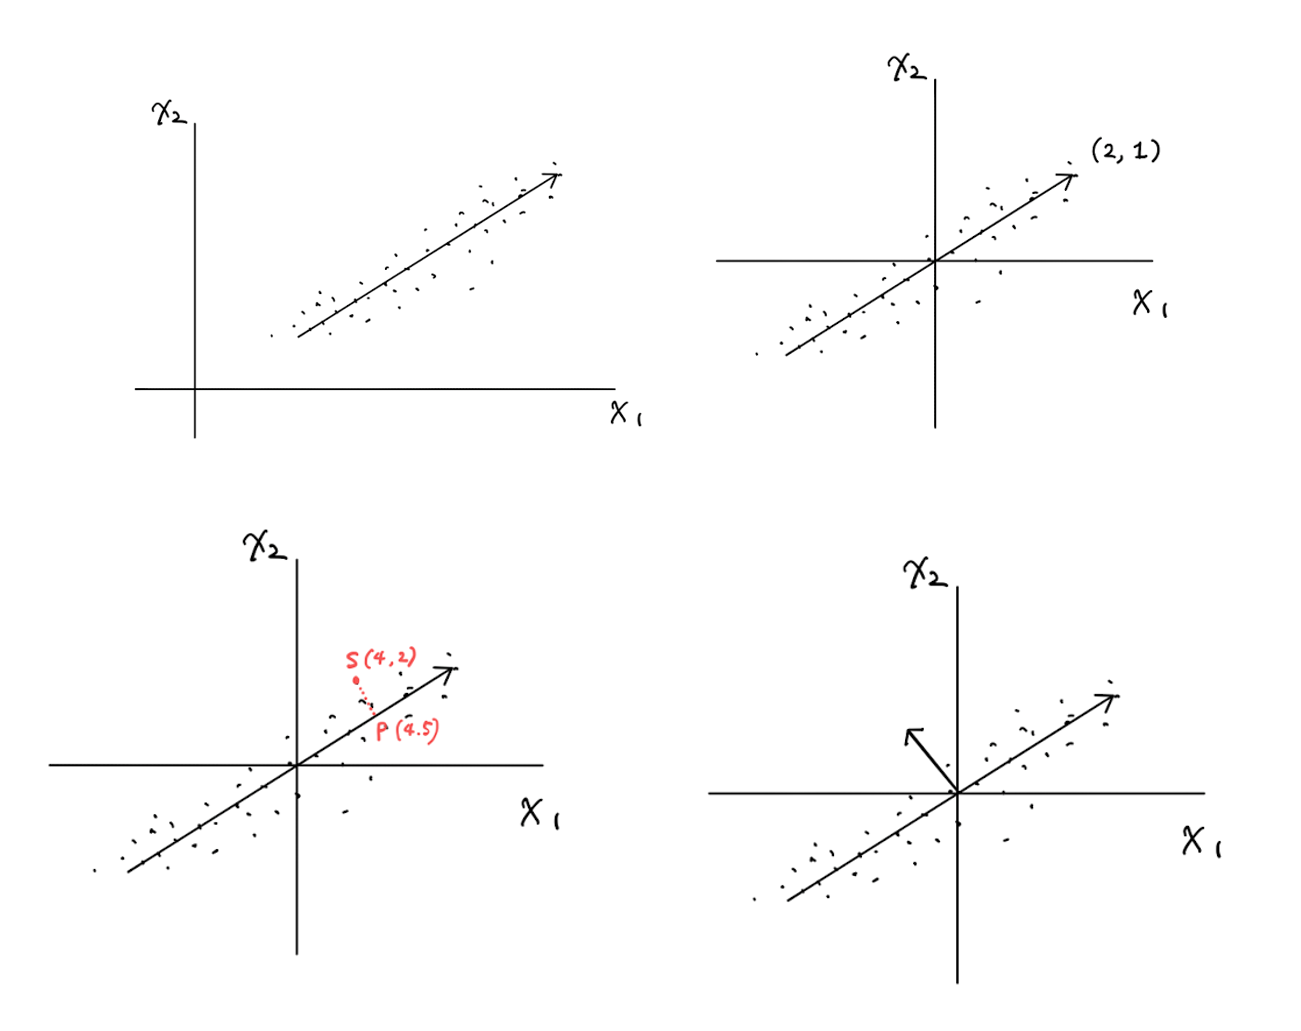

### PCA 클래스

* 사과, 파인애플, 바나나 사진 다운로드 및 넘파이 배열로 준비

In [ ]:
import wget
url = 'https://bit.ly/fruits_300_data'
wget.download(url)

In [ ]:
import numpy as np
fruits = np.load('fruits_300_data') # npy 파일 로드하여 넘파이 배얼 변수 생성
fruits_2d = fruits.reshape(-1, 100*100) # 3차원 배열을 2차원 배열로 차원 축소

* PCA 클래스 객체 생성 후 학습 : 데이터의 공분산 구조 분석
  - n_components 매개변수
    * 정수 : 사용할 주성분의 수
    * 실수 : 원하는 설명된 분산의 비율

* PCA 클래스가 찾은 주성분 확인

* 주성분별로 이미지 출력

In [ ]:
# import matplotlib.pyplot as plt

# def draw_fruits(arr, ratio=1):
#     n = len(arr)    # n은 샘플 개수입니다
#     # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
#     rows = int(np.ceil(n/10))
#     # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
#     cols = n if rows < 2 else 10
#     fig, axs = plt.subplots(rows, cols,
#                             figsize=(cols*ratio, rows*ratio), squeeze=False)
#     for i in range(rows):
#         for j in range(cols):
#             if i*10 + j < n:    # n 개까지만 그립니다.
#                 axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
#             axs[i, j].axis('off')
#     plt.show()

* 원본 데이터를 주성분에 투영하여 특성의 개수 줄이기
  - 특성의 개수 : 10,000개 -> 50개

### 원본 데이터 재구성
* **inverse_transform()** 메서드
  - 주성분 공간에서 원래 특성 공간으로 복원

### 설명된 분산(Explained Variance)
* 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
* PCA.explained_variance_ratio_ 속성으로 확인 가능

### 다른 알고리즘과 함께 사용하기
* 과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해보고 차이점 확인
* 3개의 과일 사진을 분류하기 위해 로지스틱 회귀 모델 사용

* 타깃값 생성 : 사과(0), 파인애플(1), 바나나(2)

* 원본 데이터(fruits_2d)에 대해서 교차검증을 수행하여 로지스틱 회귀 모델의 성능 확인

* PCA로 축소한 데이터(fruits_pca)에 대해서 교차검증을 수행하여 로지스특 회귀 모델의 성능 확인

* 설명된 분산의 비율을 50%에 도달할 때까지 PCA 주성분 검색

* 원본 데이터 변환후 교차 검증 수행

* 차원 축소된 데이터를 사용해 K-평균 알고리즘 적용

* 각 클러스터별 분류된 샘플의 개수 확인

* 과일의 이미지 출력

* 클러스터별 산점도 그래프 출력